# Fast Fourier Transform
The Fourier Transform is a special kind of basis function methodology. Used primarily on timeseries data, maps the original signal onto a set of sines and cosines of different frequencies and phases. The Fast Fourier Transform is the algorithm allows us to do that quickly and accurately. Mathematically, we say we are transforming the signal from the time domain into the frequency domain. The frequency domain offers many advantages of the time domain in terms of analyzing complex timeseries. It is also a reversable operation, we can go back to the time domain just as easily as we transformed the original signal to the frequency domain. FFT It helps us understand which frequencies are dominant in our times series, allows for quick and accurate filtering of signals (low pass, band pass or high pass). 

In [42]:
import os
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
from scipy import fft
from scipy import ifft
from matplotlib import cm
from tqdm import tqdm
from scipy.fft import irfft, rfft, rfftfreq

### Fonts

In [43]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Characteristics of a sine

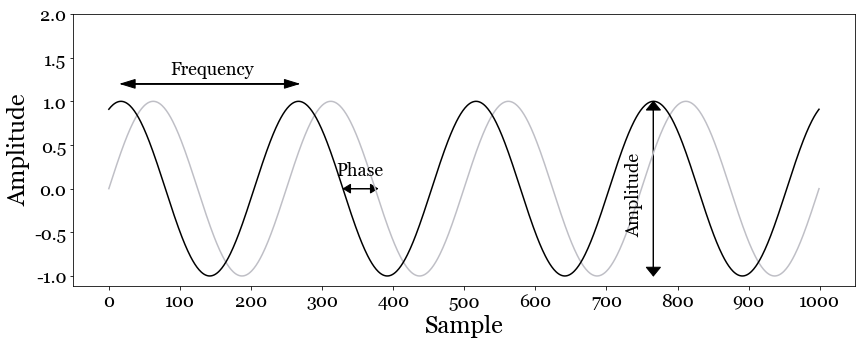

In [204]:
sample_rate = 1000
frequency = 4
phase = -np.pi-2
xtick = np.linspace(0,sample_rate,11)
xticklabel = np.round(xtick,2).astype(int)
ytick = np.linspace(-1,2,7)
yticklabel = np.round(np.linspace(-1,2,7),2)
signal = np.sin(np.linspace(phase,phase+(2*np.pi*frequency),sample_rate))
ghost = np.sin(np.linspace(0,(2*np.pi*frequency),sample_rate))

peaks = np.sort(np.argsort(signal)[:4])
valleys = np.sort(np.argsort(signal)[::-1][:4])


plt.figure(figsize=(14, 5))
plt.arrow(valleys[0],1.2,valleys[1]-valleys[0],0,length_includes_head = True,
          head_width = 0.1,head_length = 20,color='k')
plt.arrow(valleys[1],1.2,-(valleys[1]-valleys[0]),0,length_includes_head = True,
          head_width = 0.1,head_length = 20,color='k')
plt.text(valleys[0]+70,1.3,'Frequency',fontsize=18,**csfont);


plt.arrow(330,0,48,0,length_includes_head = True,
          head_width = 0.1,head_length = 10,color='k')
plt.arrow(378,0,-48,0,length_includes_head = True,
          head_width = 0.1,head_length = 10,color='k')
plt.text(320,0.15,'Phase',fontsize=18,**csfont);


plt.arrow(valleys[3],-1,0,2,length_includes_head = True,
          head_width = 20,head_length = 0.1,color='k')
plt.arrow(valleys[3],1,0,-2,length_includes_head = True,
          head_width = 20,head_length = 0.1,color='k')
plt.text(valleys[3]-40,-0.5,'Amplitude',fontsize=18,**csfont,rotation=90);
# plt.axis((0,1000,0,2))



plt.plot(ghost,c=(0.75,0.75,0.775))
plt.plot(signal,'k')
plt.xlabel('Sample',fontsize=24,**csfont);
plt.ylabel('Amplitude',fontsize=24,**csfont);
plt.xticks(xtick,labels=xticklabel,fontsize=18,**csfont);
plt.yticks(ytick,labels=yticklabel,fontsize=18,**csfont);
plt.savefig('../../assets/matplotlib/018_sine.png',dpi=300,bbox_inches="tight")

### Create Signal
We create an audio signal with 3 different frequencies. 

In [44]:
S1 = 150.00
S2 = 270.00
S3 = 360.00
sample_rate = 16000
sample_length = 1.0
no_samples_for_display = 2000
xtick = np.linspace(0,no_samples_for_display,11)
xticklabel = np.linspace(0,no_samples_for_display/sample_rate,11)
ytick = np.linspace(-1,1,5)
signal1 = np.sin(np.linspace(0,2*np.pi*S1,int(sample_rate*sample_length)))
signal2 = np.sin(np.linspace(0,2*np.pi*S2,int(sample_rate*sample_length)))
signal3 = np.sin(np.linspace(0,2*np.pi*S3,int(sample_rate*sample_length)))
signal = signal1 + signal2 + signal3

### The three sounds in isolation
We only plot a little bit of the entire signal, since plotting all of it would obscure the visibility of the waveform since there are so many samples in a second worth of data, even at a relatively low sampler rate of 16000 samples per second

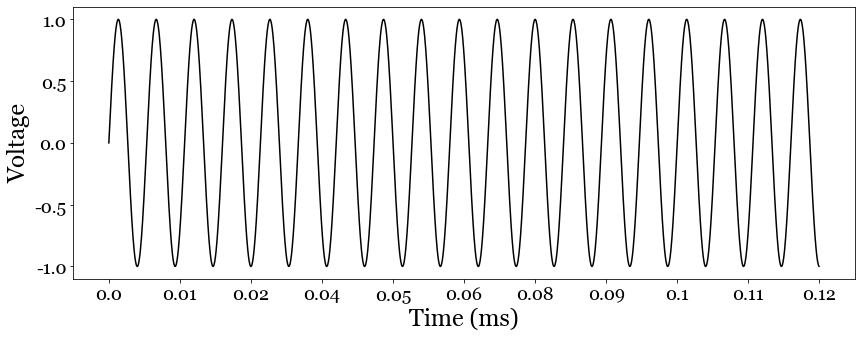

In [45]:
plt.figure(figsize=(14, 5))
plt.plot(signal1[:no_samples_for_display],c='k')
plt.xlabel('Time (ms)',fontsize=24,**csfont);
plt.ylabel('Voltage',fontsize=24,**csfont);
plt.xticks(xtick,labels=np.round(xticklabel,2),fontsize=18,**csfont);
plt.yticks(ytick,labels=ytick,fontsize=18,**csfont);
plt.savefig('../../assets/matplotlib/018_three_tones_signal1.png',dpi=300,bbox_inches="tight")
ipd.Audio(signal1, rate=sample_rate)

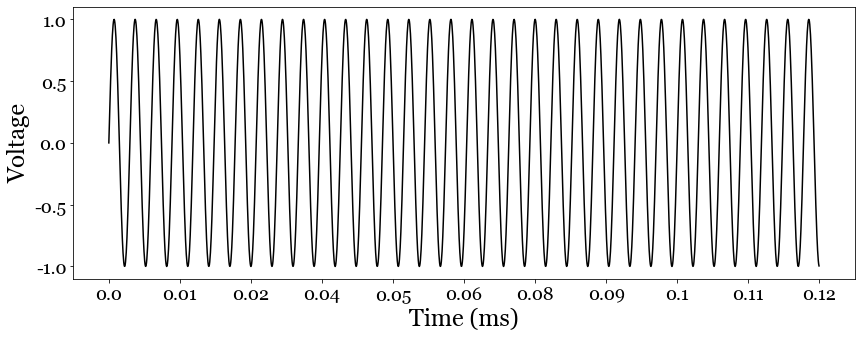

In [46]:
plt.figure(figsize=(14, 5))
plt.plot(signal2[:no_samples_for_display],c='k')
plt.xlabel('Time (ms)',fontsize=24,**csfont);
plt.ylabel('Voltage',fontsize=24,**csfont);
plt.xticks(xtick,labels=np.round(xticklabel,2),fontsize=18,**csfont);
plt.yticks(ytick,labels=ytick,fontsize=18,**csfont);
plt.savefig('../../assets/matplotlib/018_three_tones_signal2.png',dpi=300,bbox_inches="tight")
ipd.Audio(signal2, rate=sample_rate)

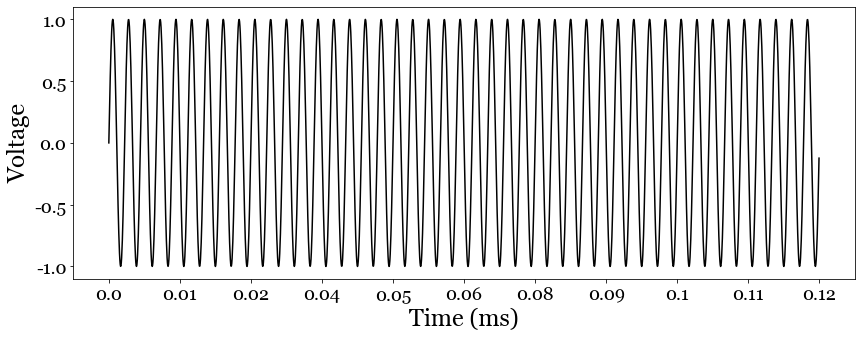

In [47]:
plt.figure(figsize=(14, 5))
plt.plot(signal3[:no_samples_for_display],c='k')
plt.xlabel('Time (ms)',fontsize=24,**csfont);
plt.ylabel('Voltage',fontsize=24,**csfont);
plt.xticks(xtick,labels=np.round(xticklabel,2),fontsize=18,**csfont);
plt.yticks(ytick,labels=ytick,fontsize=18,**csfont);
plt.savefig('../../assets/matplotlib/018_three_tones_signal3.png',dpi=300,bbox_inches="tight")
ipd.Audio(signal3, rate=sample_rate)

### Combined Sound

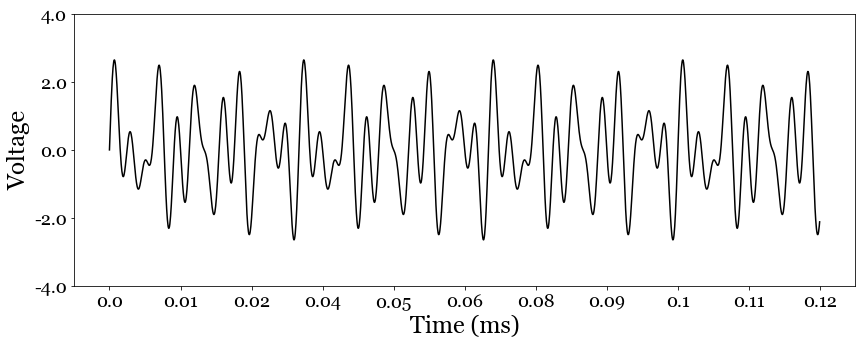

In [48]:
plt.figure(figsize=(14, 5))
plt.plot(signal[:no_samples_for_display],c='k')
plt.xlabel('Time (ms)',fontsize=24,**csfont);
plt.ylabel('Voltage',fontsize=24,**csfont);
plt.xticks(xtick,labels=np.round(xticklabel,2),fontsize=18,**csfont);
plt.yticks(ytick*4,labels=4*ytick,fontsize=18,**csfont);
plt.savefig('../../assets/matplotlib/018_three_tones_signal_combined.png',dpi=300,bbox_inches="tight")
ipd.Audio(signal, rate=sample_rate)

### We use fft to move into the frequency domain
Specifically, we use rfft, a function that wraps around the real transform and provides some handy features. 

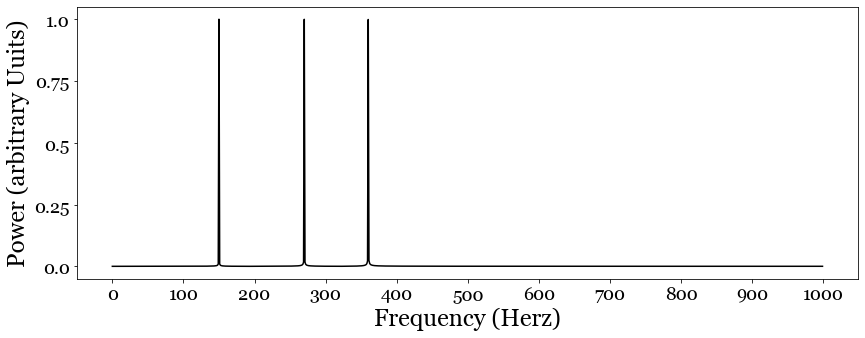

In [51]:
plt.figure(figsize=(14, 5))
N = signal.shape[0]
yf = rfft(signal)
power = np.abs(yf)
power = power / np.max(power)
xf = rfftfreq(N, 1 / sample_rate)
fxtick = np.linspace(0,1000,11)
fytick = np.linspace(0,1,5)
cutoff = np.where(xf >= 1000)[0][0]
plt.plot(xf[:cutoff], power[:cutoff],c='k')
plt.xlabel('Frequency (Herz)',fontsize=24,**csfont);
plt.ylabel('Power (arbitrary Uuits)',fontsize=24,**csfont);
plt.xticks(fxtick,labels=fxtick.astype(int),fontsize=18,**csfont);
plt.yticks(fytick,labels=fytick,fontsize=18,**csfont);
plt.savefig('../../assets/matplotlib/018_three_tones_freq_domain.png',dpi=300,bbox_inches="tight")

### Filtering
You can clearly see three peaks in the frequency domain, each corresponding to the frequency of the 3 tones we used. We will let you play with different ways of building sounds, or even loading them from file to see what you can do. For now, we will do an exercise of noise filtering. We will add white noise to the original signal, which we will subsequently remove in the frequency domain, from the noise there, and inverse back to the time domain, hopefully with the noise removed or at least reduced. 

### Add white noise to signal

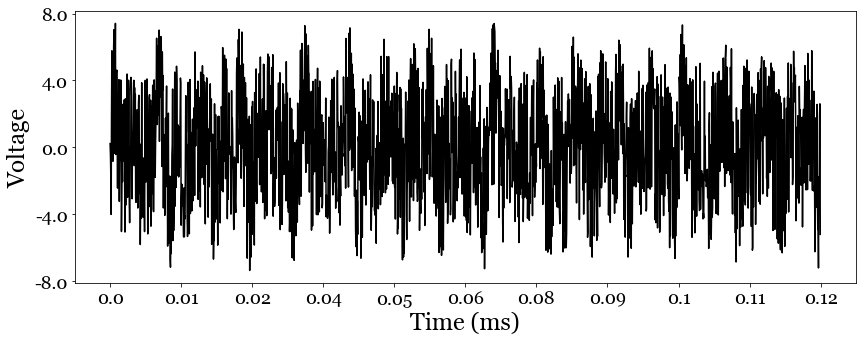

In [52]:
signal_with_noise = signal + ((np.random.random(signal.shape[0])-0.5)*10)
plt.figure(figsize=(14, 5))
plt.plot(signal_with_noise[:no_samples_for_display],c='k')
plt.xlabel('Time (ms)',fontsize=24,**csfont);
plt.ylabel('Voltage',fontsize=24,**csfont);
plt.xticks(xtick,labels=np.round(xticklabel,2),fontsize=18,**csfont);
plt.yticks(ytick*8,labels=8*ytick,fontsize=18,**csfont);
plt.savefig('../../assets/matplotlib/018_three_tones_with_noise.png',dpi=300,bbox_inches="tight")
ipd.Audio(signal_with_noise, rate=sample_rate)

### Redo the fft
What is really striking is the both visualize and perceptually, the noise is dominating in the time domain. You can barely hear the original sound over the noise. Yet the FFT still very much shows the three original frequencies between dominant

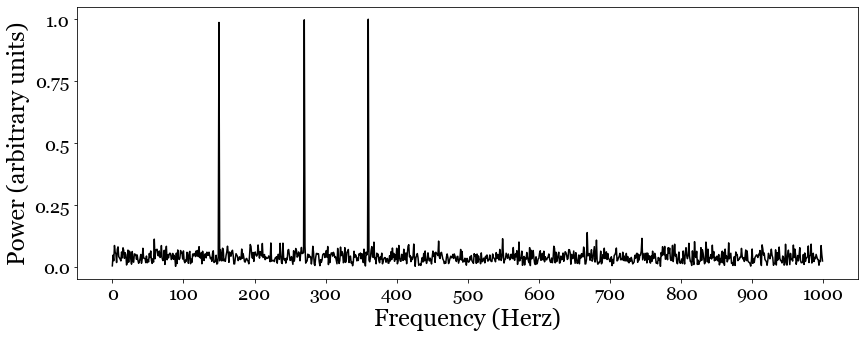

In [55]:
plt.figure(figsize=(14, 5))
N = signal_with_noise.shape[0]
yf = rfft(signal_with_noise)
power = np.abs(yf)
power = power / np.max(power)
xf = rfftfreq(N, 1 / sample_rate)
fxtick = np.linspace(0,1000,11)
fytick = np.linspace(0,1,5)
cutoff = np.where(xf >= 1000)[0][0]
plt.plot(xf[:cutoff], power[:cutoff],c='k')
plt.xlabel('Frequency (Herz)',fontsize=24,**csfont);
plt.ylabel('Power (arbitrary units)',fontsize=24,**csfont);
plt.xticks(fxtick,labels=fxtick.astype(int),fontsize=18,**csfont);
plt.yticks(fytick,labels=fytick,fontsize=18,**csfont);
plt.savefig('../../assets/matplotlib/018_three_tones_freqdomain_with_noise.png',dpi=300,bbox_inches="tight")

### Remove the white noise and inverse
There are many way to cleverly filter sounds so that there are no artifacts produced. Here, however, in the interest of understanding and time, we will simply assume that all power underneath some threshold constitutes noise, and remove it. This very simple approach already very clearly demonstrates how useful the frequency domain can be in cleaning up timeseries signals, especially when they have large number of samples, such as audio waveforms

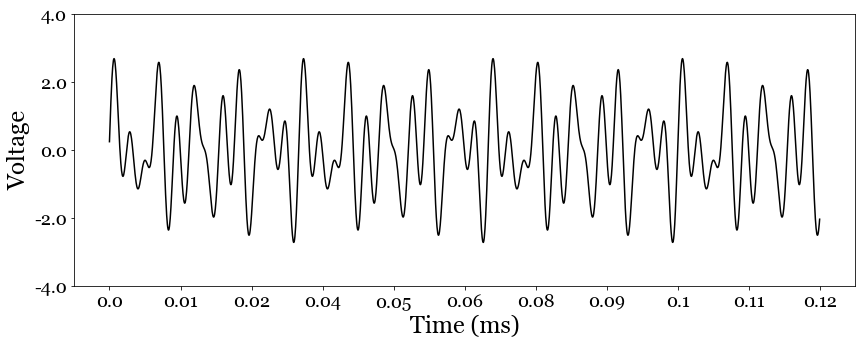

In [56]:
idx = np.where(power < 0.25)
yf[idx] = 0
signal_noise_removed = irfft(yf)
plt.figure(figsize=(14, 5))
plt.plot(signal_noise_removed[:no_samples_for_display],c='k')
plt.xlabel('Time (ms)',fontsize=24,**csfont);
plt.ylabel('Voltage',fontsize=24,**csfont);
plt.xticks(xtick,labels=np.round(xticklabel,2),fontsize=18,**csfont);
plt.yticks(ytick*4,labels=4*ytick,fontsize=18,**csfont);
plt.savefig('../../assets/matplotlib/018_three_tones_combined_noise_removed.png',dpi=300,bbox_inches="tight")
ipd.Audio(signal_noise_removed, rate=sample_rate)

# Spectograms
Where as the FFT operates on the entire signal, we can also divide the signal up into smaller sections, and perform FFT on each of these in turn. This allows us to track the change over time in frequency (and phase). We can plot the frequency as a function of time, which is called a spectrogram. Spectrograms are helpful to understand changes overtime in our signal of interest, or to detect certain signatures in time, like certain words being vocalized by a human. It is mostly outside of the scope of this course, but we will at least show you how speech looks like in the time/frequency domain. See if you can identify the individual words.

### Load the waveform data

In [34]:
ferris,sample_rate = librosa.load('../../data/speech/ferris_bueller.wav', sr=16000)
planes,sample_rate = librosa.load('../../data/speech/planes_trains_and_automobiles.wav', sr=16000)

### Create Spectrogram and plot

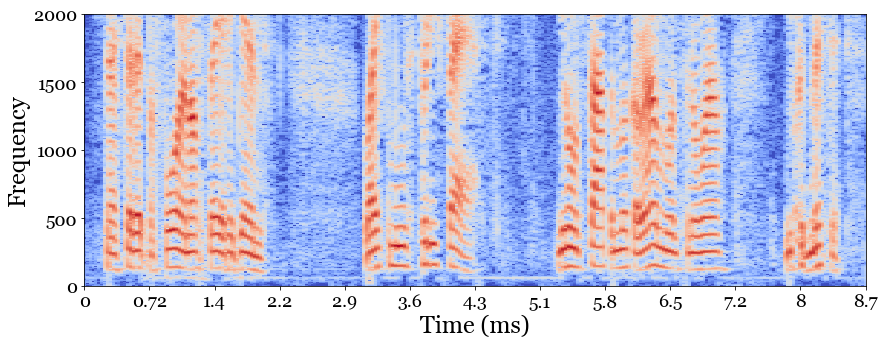

In [41]:
X = librosa.stft(ferris)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.xlabel('Time (ms)',fontsize=24,**csfont);
plt.ylabel('Frequency',fontsize=24,**csfont);
plt.yticks(np.linspace(0,2000,5),labels=np.linspace(0,2000,5).astype(int),fontsize=18,**csfont);
plt.xticks(np.linspace(0,len(ferris)/16000,13),fontsize=18,**csfont);
ipd.Audio(ferris, rate=sample_rate)
plt.axis((0,len(ferris)/16000,0,2000))
plt.savefig('../../assets/matplotlib/018_ferris_bueller_spectrogram.png',dpi=300,bbox_inches="tight")